In [ ]:
!pip install neuron

In [ ]:
from neuron import h
from neuron.units import ms, mV
import matplotlib.pyplot as plt
h.load_file("stdrun.hoc")

1.0

In [ ]:
my_cell = h.IntFire1()
my_cell.tau = 4 * ms
my_cell.refrac = 10 * ms

In [ ]:
e_stims = h.NetStim()
e_stims.noise = True
e_stims.interval = 3 * ms
e_stims.start = 0 * ms
e_stims.number = 1e10

In [ ]:
nc = h.NetCon(e_stims, my_cell)
nc.weight[0] = 0.5
nc.delay = 0 * ms

In [ ]:
stim_times = h.Vector()
output_times = h.Vector()
stim_times_nc = h.NetCon(e_stims, None)
stim_times_nc.record(stim_times)
output_times_nc = h.NetCon(my_cell, None)
output_times_nc.record(output_times)

0.0

In [ ]:
h.finitialize(-65 * mV)
h.continuerun(100 * ms)

0.0

Text(0.5, 0, 'time (ms)')

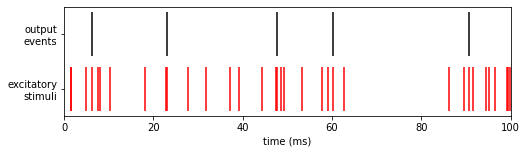

In [ ]:
fig, ax = plt.subplots(figsize=(8, 2))

for c, (color, data) in enumerate([("red", stim_times), ("black", output_times)]):
  ax.vlines(data, c - 0.4, c + 0.4, colors=color)

ax.set_yticks([0, 1])
ax.set_yticklabels(['excitatory\nstimuli', 'output\nevents'])

ax.set_xlim([0, h.t])

ax.set_xlabel('time (ms)')

